### 1. Import libraries and Load the Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cars-RF.csv")

### 2. View Summary of Dataset.

In [3]:
df.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [4]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### 3. Check if there are any Null Variables.

In [6]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

### 4. Exploratory data analysis and Rename column names.

In [7]:
col_names = ['Cost', 'Maintenance', 'Doors', 'Persons', 'Luggage boot', 'Safety', 'Class']
df.columns = col_names

In [8]:
df.head()

,Cost,Maintenance,Doors,Persons,Luggage boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 5. Check the frequency counts of all categorical variables and ‘Class’ variables.

In [9]:
df.shape

(1727, 7)

In [10]:
for col in col_names:
    print(df[col].value_counts()) 

Cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maintenance
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
Persons
4       576
more    576
2       575
Name: count, dtype: int64
Luggage boot
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64
Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
df['Class'].value_counts()

Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [12]:
X = df.drop(['Class'], axis=1)
y = df['Class']

### 6. Split data into training and test sets.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 7. Check the shape of X_train and X_test and check the data types of variables.

In [14]:
X_train.shape,X_test.shape 

((1381, 6), (346, 6))

In [15]:
type(X_train)

pandas.core.frame.DataFrame

In [16]:
X_train.dtypes

Cost            object
Maintenance     object
Doors           object
Persons         object
Luggage boot    object
Safety          object
dtype: object

### 8. Encode categorical variables using ordinal encoding.

In [17]:
import category_encoders as ce
oe = ce.OrdinalEncoder(cols=col_names[:-1])
X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)

In [18]:
X_train.head()

,Cost,Maintenance,Doors,Persons,Luggage boot,Safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [19]:
X_test.head()

,Cost,Maintenance,Doors,Persons,Luggage boot,Safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


### 9. Check Random Forest Classifier model with default parameters and Random Forest Classifier model with parameters(n_estimators).

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
rf_classifier = RandomForestClassifier(random_state=42)

In [29]:
rf_classifier.fit(X_train, y_train)
y_pred_oe = rf_classifier.predict(X_test)

In [30]:
# Calculate accuracy
accuracy_oe = accuracy_score(y_test, y_pred_oe)
print("Ordinal Encoder Accuracy: ", accuracy_oe)

Ordinal Encoder Accuracy:  0.9508670520231214


* Random forest with 10 trees

In [31]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.9277


* Random forest with a 100 trees

In [33]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees: 0.9480


In [34]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### 10. Find important features with the Random Forest model.

In [44]:
clf.feature_importances_

array([0.22496309, 0.09532819, 0.0536204 , 0.21459543, 0.08957939,
       0.32191349])

### 11. Use the feature importance variable to see feature importance scores.

In [35]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Safety          0.290475
Persons         0.243671
Cost            0.211239
Maintenance     0.117199
Luggage boot    0.077384
Doors           0.060033
dtype: float64

### 12. Visualize feature scores of the features.

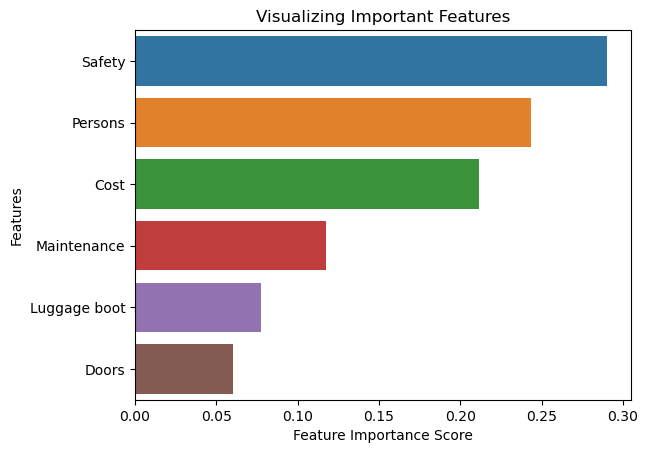

In [43]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 13. Build Random Forest model on selected features.

In [37]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9277


### 14. Print the Confusion Matrix.

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[ 73   2   2   0]
 [  6   6   0   3]
 [  7   0 230   0]
 [  5   0   0  12]]


### 15. Display the precision, recall, f1 and support scores using Classification report.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.80      0.95      0.87        77
        good       0.75      0.40      0.52        15
       unacc       0.99      0.97      0.98       237
       vgood       0.80      0.71      0.75        17

    accuracy                           0.93       346
   macro avg       0.84      0.76      0.78       346
weighted avg       0.93      0.93      0.92       346

